In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=50
sns.set(style="dark", rc={'figure.facecolor': 'gray'})



In [2]:
# Load dataset
df=pd.read_csv("heart_disease.csv")
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
# show Number of people with heart diseases
#
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [4]:
# show percentage of male and female
count_female=len(df[df.sex==0])
count_male=len(df[df.sex==1])
# show output
print('percentage of Female Patients:{:.2f}%'.format(count_female/(len(df.sex))*100))
print('percentage of male Patients:{:.2f}%'.format(count_male/(len(df.sex))*100))

percentage of Female Patients:30.44%
percentage of male Patients:69.56%


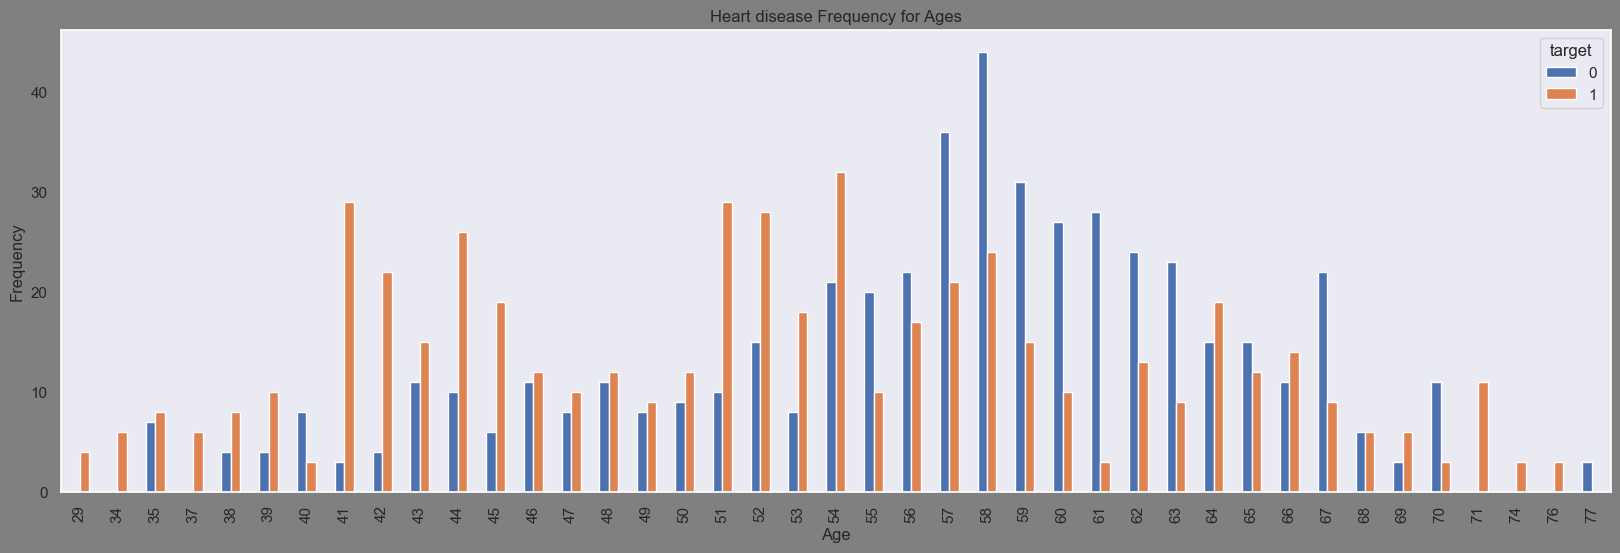

In [5]:
# bar plot showing heart disease frequency of age
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


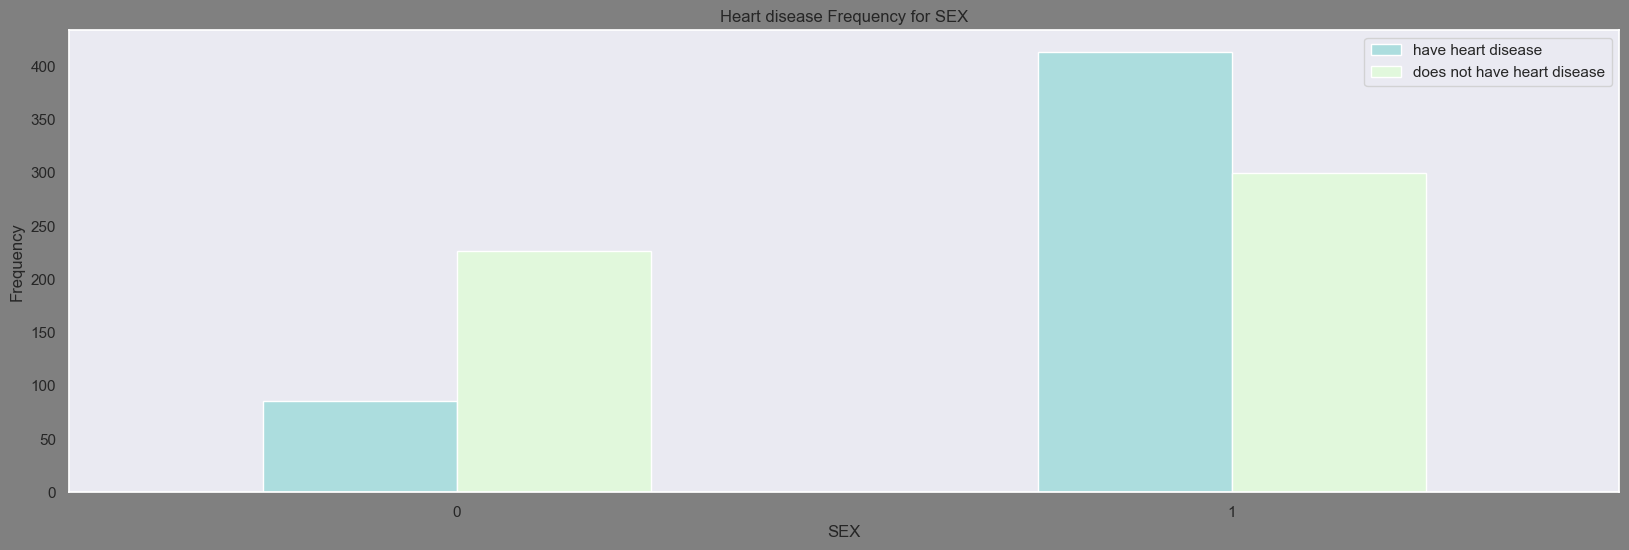

In [6]:
# bar plot showing heart disease frequency of age
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(20,6),color=['#ACDDDE','#E1F8DC'])
plt.title('Heart disease Frequency for SEX')
plt.xlabel('SEX')
plt.legend(['have heart disease','does not have heart disease'])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


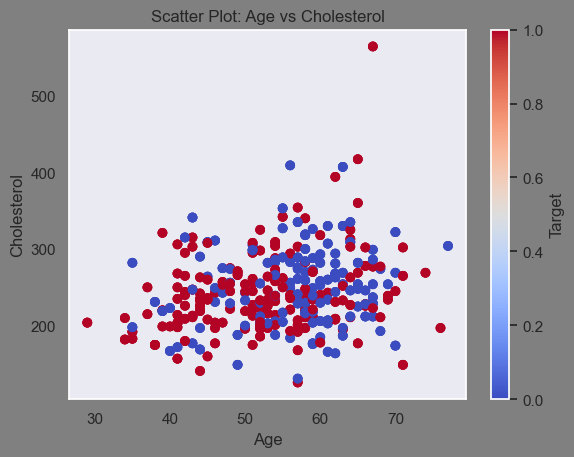

In [7]:
# scatter plot showing heart disease frequency of age
plt.scatter(df.age, df.chol, c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()


In [8]:
x=df[['age']]
y=df['target']

In [9]:
# view x samples
x

,age
0,52
1,53
2,70
3,61
4,62
...,...
1020,59
1021,60
1022,47
1023,50


In [10]:
# view y samples
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [11]:
# spliting the dataset for training and testing, here training is 90% and testing 10%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=10)
len(x_train) # x columns to train

922

In [12]:
len(x_test) # x columns to test

103

In [13]:
x_train

,age
896,59
900,61
983,64
728,46
358,59
...,...
156,40
123,65
369,51
320,53


In [14]:
# using LogisticRegression
clf=LogisticRegression()

In [15]:
# train dataset
clf.fit(x_train,y_train)

LogisticRegression()

In [16]:
# predict trend
clf.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [17]:
y_test

620     0
181     1
546     0
618     1
822     0
       ..
729     1
971     1
284     0
1022    0
500     1
Name: target, Length: 103, dtype: int64

In [18]:
# Testing for accuracy of the model
clf.score(x_test,y_test)

0.7281553398058253

In [19]:
# predicting probability
clf.predict_proba(x_test)

array([[0.52163768, 0.47836232],
       [0.60797921, 0.39202079],
       [0.67715537, 0.32284463],
       [0.42166711, 0.57833289],
       [0.55911144, 0.44088856],
       [0.44638223, 0.55361777],
       [0.44638223, 0.55361777],
       [0.36180928, 0.63819072],
       [0.53417715, 0.46582285],
       [0.55911144, 0.44088856],
       [0.58375109, 0.41624891],
       [0.36180928, 0.63819072],
       [0.50907089, 0.49092911],
       [0.58375109, 0.41624891],
       [0.54667357, 0.45332643],
       [0.3502735 , 0.6497265 ],
       [0.37350658, 0.62649342],
       [0.61990455, 0.38009545],
       [0.55911144, 0.44088856],
       [0.26495426, 0.73504574],
       [0.61990455, 0.38009545],
       [0.48391879, 0.51608121],
       [0.26495426, 0.73504574],
       [0.55911144, 0.44088856],
       [0.44638223, 0.55361777],
       [0.45884789, 0.54115211],
       [0.60797921, 0.39202079],
       [0.52163768, 0.47836232],
       [0.55911144, 0.44088856],
       [0.3853537 , 0.6146463 ],
       [0.

In [20]:
#predicting using the age
clf.predict([[50]])

C:\Users\WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Decission Tree


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
# load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [42]:
# create a decision Tree classifier
model=DecisionTreeClassifier()
# fit the classier to the training data
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [43]:
# Printing the accuracy of the model
model.predict(x_test)

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [44]:
predictions = model.predict(x_test)
# Print the accuracy of the model
accuracy = (predictions == y_test).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.7378640776699029


In [45]:
# Print the decision tree in text format
tree_rules = export_text(model, feature_names=list(x.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- age <= 54.50
|   |--- age <= 42.50
|   |   |--- age <= 40.50
|   |   |   |--- age <= 39.50
|   |   |   |   |--- age <= 34.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  34.50
|   |   |   |   |   |--- age <= 36.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  36.00
|   |   |   |   |   |   |--- age <= 37.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  37.50
|   |   |   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  38.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- age >  39.50
|   |   |   |   |--- class: 0
|   |   |--- age >  40.50
|   |   |   |--- age <= 41.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  41.50
|   |   |   |   |--- class: 1
|   |--- age >  42.50
|   |   |--- age <= 45.50
|   |   |   |--- age <= 43.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  43.50
|   |   |   |

[Text(0.5343137254901961, 0.9444444444444444, 'x[0] <= 54.5\ngini = 0.5\nsamples = 922\nvalue = [453, 469]'),
 Text(0.2034313725490196, 0.8333333333333334, 'x[0] <= 42.5\ngini = 0.452\nsamples = 425\nvalue = [147, 278]'),
 Text(0.09803921568627451, 0.7222222222222222, 'x[0] <= 40.5\ngini = 0.357\nsamples = 112\nvalue = [26, 86]'),
 Text(0.058823529411764705, 0.6111111111111112, 'x[0] <= 39.5\ngini = 0.441\nsamples = 61\nvalue = [20, 41]'),
 Text(0.0392156862745098, 0.5, 'x[0] <= 34.5\ngini = 0.365\nsamples = 50\nvalue = [12, 38]'),
 Text(0.0196078431372549, 0.3888888888888889, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.058823529411764705, 0.3888888888888889, 'x[0] <= 36.0\ngini = 0.414\nsamples = 41\nvalue = [12, 29]'),
 Text(0.0392156862745098, 0.2777777777777778, 'gini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.0784313725490196, 0.2777777777777778, 'x[0] <= 37.5\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(0.058823529411764705, 0.16666666666666666, 'gini = 0.0

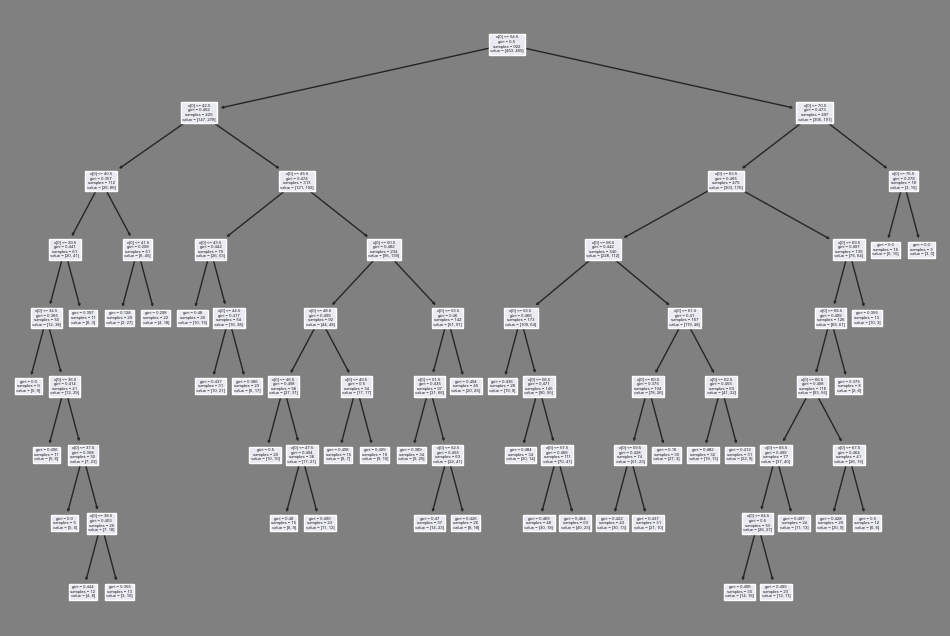

In [46]:
# visualise decisio tree
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(x_train,y_train))

In [51]:
class_names=df['target'].unique().astype(str)
# visualisation of decision tree
import graphviz
tree.export_graphviz(model, out_file="New_heart_disease.dot",feature_names=x_train.columns,class_names=class_names,label='all',filled=True,rounded=True)